# DBSCAN
## (Density Based Spatial Clustering of Applications with Noise) ##

> 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능
> - epsilon(입실론 주변 영역) : 
> 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
> - min points(최소 데이터 개수) : 
> 개별 데이터의 입실론 주변 여역에 포함되는 타 데이터의 개수
> - Core Point(핵심 포인트) : 
> 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를
> 핵심 포인트라고 함
> - Neighbor Point(이웃 포인트) :
> 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함
> - Border Point(경계 포인트) : 
> 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함
> - Noise Point(잡음 포인트) : 
> 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd

irisDF = pd.DataFrame(load_iris().data, columns = ["sepal_length", "sepal_width",
                                                  "petal_length", "petal_width"])
irisDF["target"] = load_iris().target
dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(load_iris().data)
irisDF["dbscan_cluster"] = dbscan_labels

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


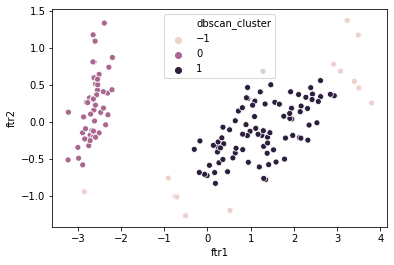

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(load_iris().data)
irisDF["ftr1"] = pca_transformed[:, 0]
irisDF["ftr2"] = pca_transformed[:, 1]
sns.scatterplot(x = "ftr1", y = "ftr2", data = irisDF, hue = "dbscan_cluster")

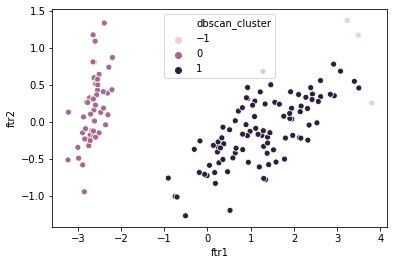

In [6]:
dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(load_iris().data)

irisDF["dbscan_cluster"] = dbscan_labels
pca_transformed = pca.fit_transform(load_iris().data)
irisDF["ftr1"] = pca_transformed[:, 0]
irisDF["ftr2"] = pca_transformed[:, 1]
sns.scatterplot(x = "ftr1", y = "ftr2", data = irisDF, hue = "dbscan_cluster")